<ipython-input-1-4309ee3a0081>:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


epoch: 0 loss:  92.32078294903626
epoch: 400 loss:  33.79131790081576
epoch: 800 loss:  27.9918542960729
epoch: 1200 loss:  24.33481690722147
epoch: 1600 loss:  22.028754937538633
epoch: 2000 loss:  20.57459375662496
epoch: 2400 loss:  19.657625883308423
epoch: 2800 loss:  19.07940244306619
epoch: 3200 loss:  18.71478514667572
epoch: 3600 loss:  18.48486404079425
epoch: 4000 loss:  18.33987992881413
epoch: 4400 loss:  18.248455556762373
epoch: 4800 loss:  18.19080499291156
epoch: 5200 loss:  18.154451584758743
epoch: 5600 loss:  18.131527779750563
epoch: 6000 loss:  18.117072440822145
epoch: 6400 loss:  18.1079571642151
epoch: 6800 loss:  18.102209234814435
epoch: 7200 loss:  18.098584693967343
epoch: 7600 loss:  18.096299123732113
epoch: 8000 loss:  18.094857884270205
epoch: 8400 loss:  18.093949064600373
epoch: 8800 loss:  18.09337597927063
epoch: 9200 loss:  18.093014601974247
epoch: 9600 loss:  18.092786723954067
epoch: 10000 loss:  18.09264302817517
epoch: 10400 loss:  18.09255241

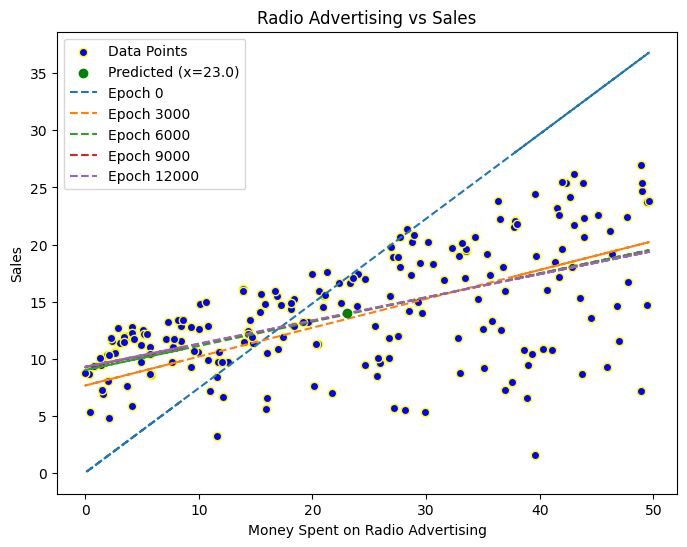

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Replace 'your_dataset.csv' with the name of your file
data = pd.read_csv('Advertising.csv')

radio_ad_spent = data['radio']  # Column for radio advertising
sales = data['sales']


def train(spendings, sales, w, b, alpha, epochs):
    lines = []
    for e in range (epochs):
        w,b=update_w_and_b(spendings, sales, w, b, alpha)

        if e % 3000 == 0:
            lines.append((w, b, e))
        
        if e % 400 == 0:
            print("epoch:", e, "loss: ", avg_loss(spendings, sales, w, b))
    return w, b, lines

def update_w_and_b(spendings, sales, w, b, alpha):
    dl_dw=0.0
    dl_db=0.0
    N = len(spendings)

    for i in range(N):
        dl_dw += -2 * spendings[i] * (sales[i] - (w * spendings[i] + b))
        dl_db += -2*(sales[i] - (w*spendings[i] + b))

    w = w - (1/float(N)) *dl_dw*alpha
    b = b - (1/float(N)) *dl_db*alpha

    return w, b

def avg_loss(spendings, sales, w, b):
    N = len(spendings)
    total_error = 0.0
    for i in range(N):
        total_error += (sales[i] - (w*spendings[i] + b))** 2
    return total_error / float(N)

def predict(x,w,b):
    return w*x+b

w,b, lines = train(radio_ad_spent, sales, 0.0, 0.0, 0.001, 15000)
print("Final weight:", w)
print("Final bias:", b)
x_new=23.0
y_new=predict(x_new, w, b)

print("Predicted sales for x_new =", x_new, "is:", y_new)

# Plot the data
plt.figure(figsize=(8, 6))
plt.scatter(radio_ad_spent, sales, color='blue', edgecolors='yellow', label='Data Points')  # original points
plt.scatter(x_new, y_new, color='green', label=f'Predicted (x={x_new})', zorder=5)  # predicted point in red

# Plot the regression lines at every 3000 epochs with epoch number
for (w_line, b_line, epoch) in lines:
    plt.plot(radio_ad_spent, w_line * radio_ad_spent + b_line, label=f'Epoch {epoch}', linestyle='--')

plt.title('Radio Advertising vs Sales')
plt.xlabel('Money Spent on Radio Advertising')
plt.ylabel('Sales')
plt.legend()
plt.show()